In [ ]:
import MetaTrader5 as mt5
import pandas as pd
import ta.momentum as momentum
from datetime import datetime, timedelta
import time 

def get_historical_data(symbol, timeframe, number_of_data = 50):
    if not mt5.initialize():
        print("initialize() failed")
        mt5.shutdown()
        return None

    rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, number_of_data)

    if rates is None:
        print("Failed to retrieve historical data.")
        mt5.shutdown()
        return None

    df = pd.DataFrame(rates)
    df["time"] = pd.to_datetime(df["time"], unit= "s")
    df = df.set_index("time")

    mt5.shutdown()

    return df

data = get_historical_data("Volatility 25 Index", mt5.TIMEFRAME_M15, number_of_data = 70000)

data.to_csv("v25.csv")

In [ ]:
import pandas as pd
import plotly.graph_objects as go

def plot_candlestick_chart(csv_file_path):
    df = pd.read_csv(csv_file_path)

    df['time'] = pd.to_datetime(df['time'])

    fig = go.Figure(data=[go.Candlestick(x=df['time'],
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'])])

    fig.update_layout(title='Candlestick Chart',
    xaxis_title='Time',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False)

    fig.show()

csv_file_path = 'v25.csv'
plot_candlestick_chart(csv_file_path)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, median_absolute_error


In [47]:
df = pd.read_csv("v25.csv")

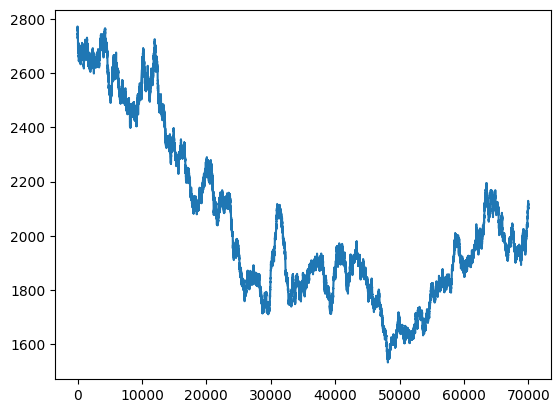

In [48]:
plt.plot(df.index, df["close"])

In [49]:
slipt = int(len(df) * 0.9)

training_data = list(df[0:slipt]["close"])
test_data = list(df[slipt:]["close"])

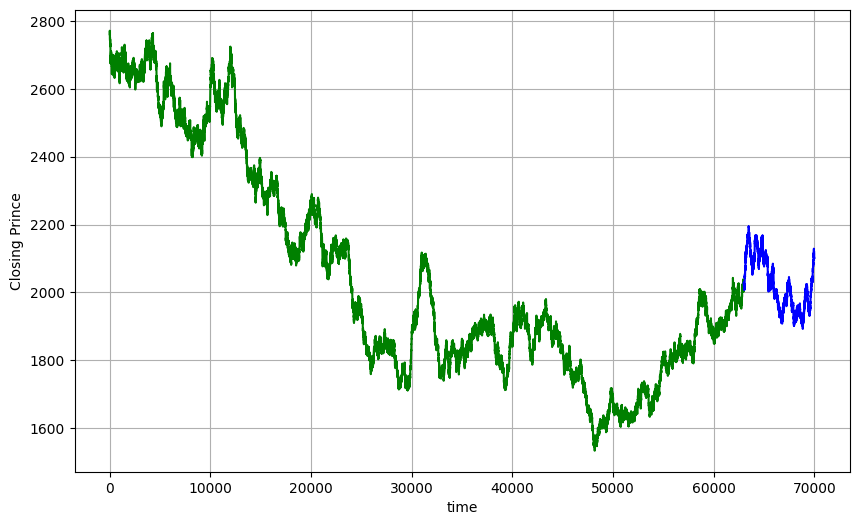

In [50]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('time')
plt.ylabel('Closing Prince')
plt.plot(df[:slipt]["close"], 'green', label='Train Data')
plt.plot(df[slipt:]["close"], 'blue', label='Test Data')
plt.show()

In [41]:
model_prediction = []
n_test_obser = len(test_data)

In [42]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_prediction.append(yhat)
    actual_test_values = test_data[i]
    training_data.append(actual_test_values)

In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10089
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -40738.000
Date:                Wed, 09 Aug 2023   AIC                          81486.000
Time:                        19:14:32   BIC                          81522.096
Sample:                             0   HQIC                         81498.213
                              - 10089                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0123      0.009     -1.309      0.190      -0.031       0.006
ar.L2         -0.0082      0.009     -0.873      0.383      -0.027       0.010
ar.L3          0.0063      0.009      0.681      0.496      -0.012       0.024
ar.L4         -0.0009      0.009     -0.092      0.926      -0.019       0.017
sigma2       188.4780      2.327     81.009      0.000     183.918     193.038
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               156.71
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

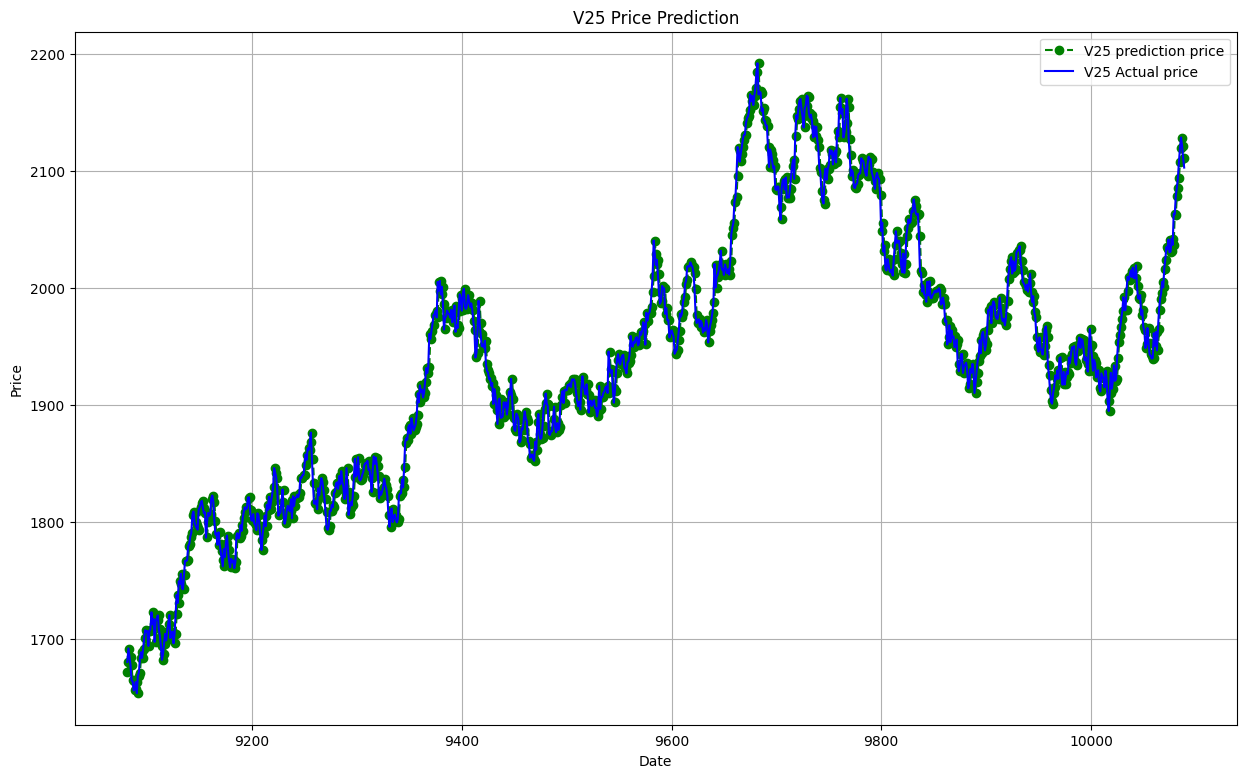

In [45]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[slipt:].index
plt.plot(data_range, model_prediction, color='green', marker= 'o', linestyle = "dashed", label = "V25 prediction price")
plt.plot(data_range, test_data, color='blue', label = "V25 Actual price")

plt.title("V25 Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()